<a href="https://colab.research.google.com/github/jonnie763/DATA-690-WANG/blob/master/Jonathan_Rius_Deliverable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1.Country Analysis- Data Cleanse**

In [350]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy
plt.rcParams['figure.figsize'] = 25, 12


In [351]:
df= pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=233,336,299,&s=NGDP_RPCH,&sy=2015&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1")
df = df[0]
df


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,2016,2017,2018,2019,2020
0,Colombia,"Gross domestic product, constant prices",Percent change,NaN,NaN,2.956,2.087,1.359,2.515,3.260,-8.182
1,Guyana,"Gross domestic product, constant prices",Percent change,NaN,NaN,0.687,3.807,3.734,4.441,5.353,26.205
2,Venezuela,"Gross domestic product, constant prices",Percent change,NaN,NaN,-6.221,-17.040,-15.671,-19.621,-35.000,-25.000


In [352]:
df=df.drop(columns=['Subject Descriptor',"Units","Scale","Country/Series-specific Notes"])
df

,Country,2015,2016,2017,2018,2019,2020
0,Colombia,2.956,2.087,1.359,2.515,3.260,-8.182
1,Guyana,0.687,3.807,3.734,4.441,5.353,26.205
2,Venezuela,-6.221,-17.040,-15.671,-19.621,-35.000,-25.000


In [353]:
Years= list(df) # Listing numbers from tuition fee for UMBC
Years

['Country', '2015', '2016', '2017', '2018', '2019', '2020']

In [354]:
Years.remove('Country') 
Years

['2015', '2016', '2017', '2018', '2019', '2020']

In [355]:
long_df = df.melt(
    id_vars="Country",                          # Unique identifier
    value_vars=Years,    # List of columns to be melted to a single variable
    var_name="Years",                          # The new column name for the variable
    value_name="GDP Percentage Growth"                         # The new column name for the value
)

long_df

,Country,Years,GDP Percentage Growth
0,Colombia,2015,2.956
1,Guyana,2015,0.687
2,Venezuela,2015,-6.221
3,Colombia,2016,2.087
4,Guyana,2016,3.807
5,Venezuela,2016,-17.040
6,Colombia,2017,1.359
7,Guyana,2017,3.734
8,Venezuela,2017,-15.671
9,Colombia,2018,2.515


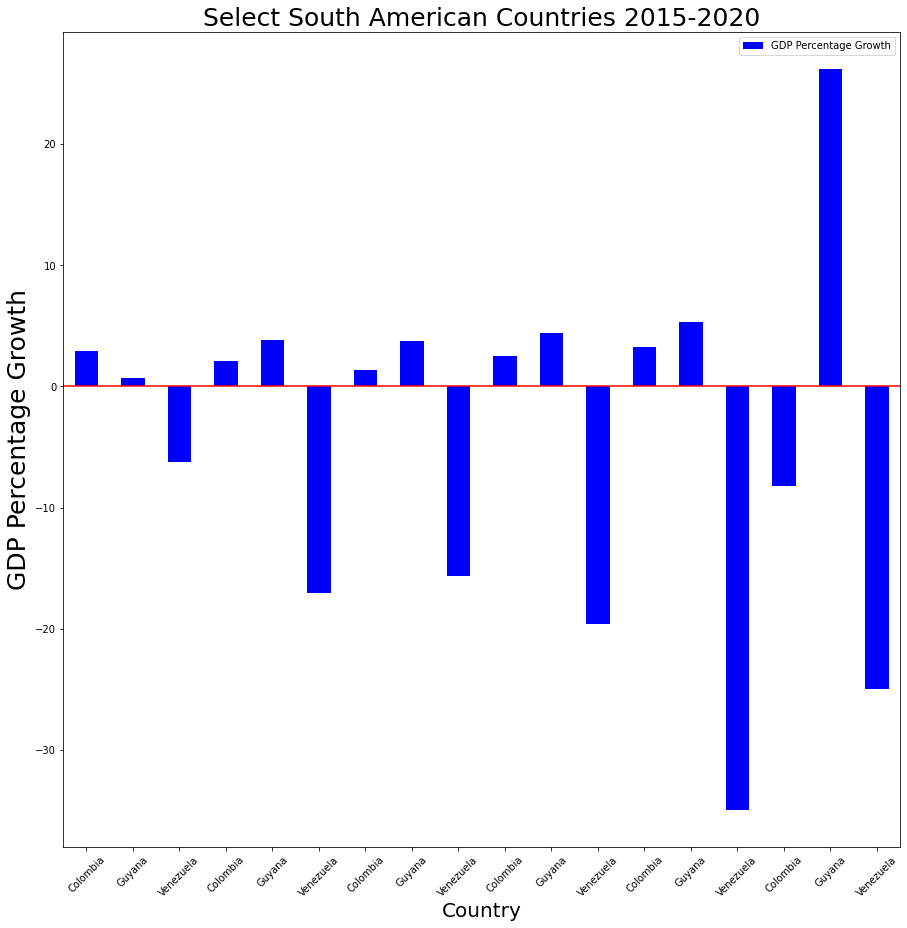

In [356]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_ylabel("GDP Percentage Growth",fontname="Arial", fontsize=25)
ax.set_xlabel("Country",fontname="Arial", fontsize=20)
ax.set_title("Select South American Countries 2015-2020",fontname="Arial", fontsize=25)
long_df.plot(kind='bar',x='Country',y='GDP Percentage Growth', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)
plt.axhline(y=0, color='r') 

In [357]:
df= pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=299,&s=PCPIPCH,&sy=1990&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1")
df = df[0]
df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,"Inflation, average consumer prices",Percent change,NaN,NaN,40.656,34.205,31.423,38.122,60.817,59.923,99.876,50.04,35.782,23.57,16.206,12.531,22.434,31.091,21.747,15.955,13.663,18.699,31.441,26.041,28.187,26.09,21.069,40.639,62.169,121.738,254.949,438.117,65374.082,19906.024,6500.0


In [358]:
df=df.drop(columns=['Subject Descriptor',"Units","Scale","Country/Series-specific Notes"])
df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,40.656,34.205,31.423,38.122,60.817,59.923,99.876,50.04,35.782,23.57,16.206,12.531,22.434,31.091,21.747,15.955,13.663,18.699,31.441,26.041,28.187,26.09,21.069,40.639,62.169,121.738,254.949,438.117,65374.082,19906.024,6500.0


In [359]:
Years_2= list(df) # Listing numbers from tuition fee for UMBC
Years_2

['Country',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [360]:
Years_2.remove('Country') 
Years_2

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [361]:
long_df = df.melt(
    id_vars="Country",                          # Unique identifier
    value_vars=Years_2,    # List of columns to be melted to a single variable
    var_name="Years_2",                          # The new column name for the variable
    value_name="Inflation Rate"                         # The new column name for the value
)

long_df

,Country,Years_2,Inflation Rate
0,Venezuela,1990,40.656
1,Venezuela,1991,34.205
2,Venezuela,1992,31.423
3,Venezuela,1993,38.122
4,Venezuela,1994,60.817
5,Venezuela,1995,59.923
6,Venezuela,1996,99.876
7,Venezuela,1997,50.040
8,Venezuela,1998,35.782
9,Venezuela,1999,23.570


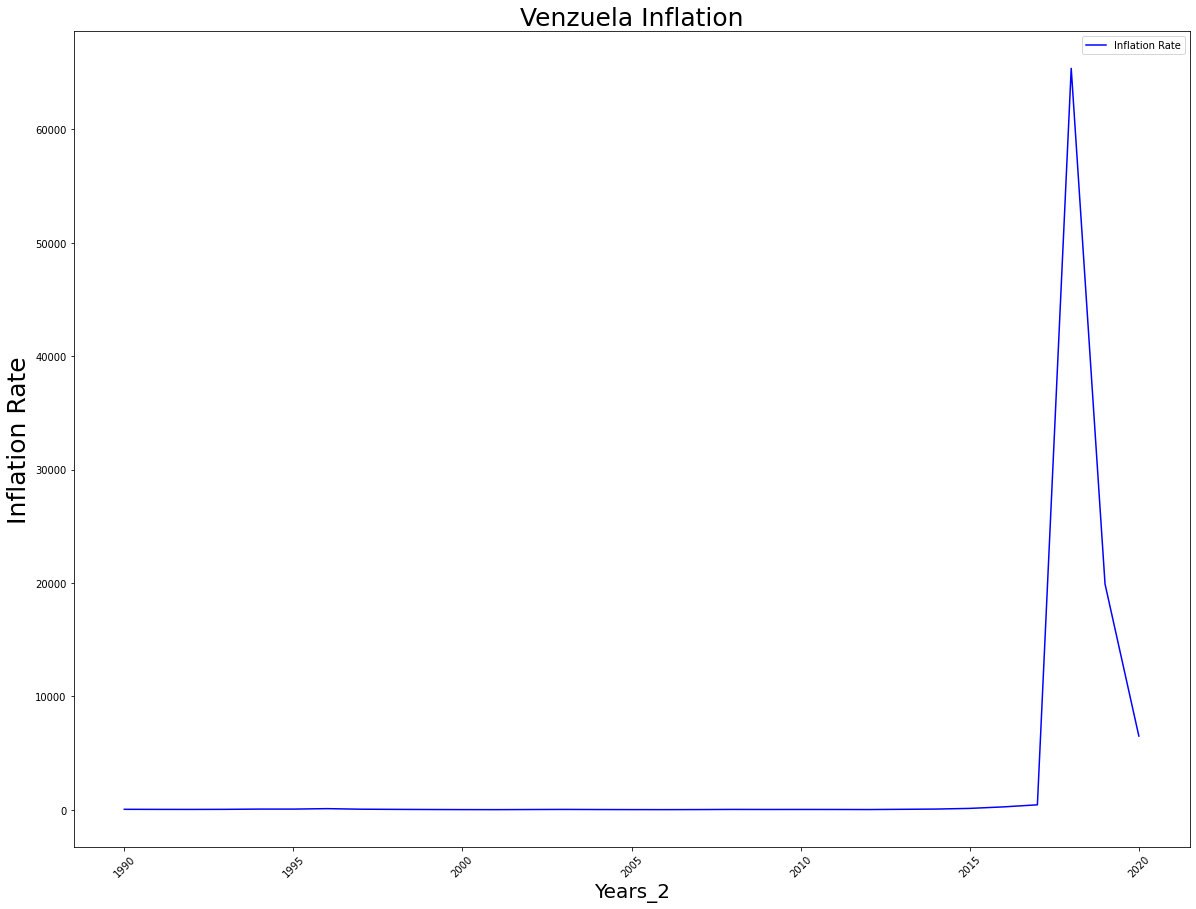

In [362]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Inflation Rate",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Inflation",fontname="Arial", fontsize=25)
long_df.plot(kind='line',x='Years_2',y='Inflation Rate', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)


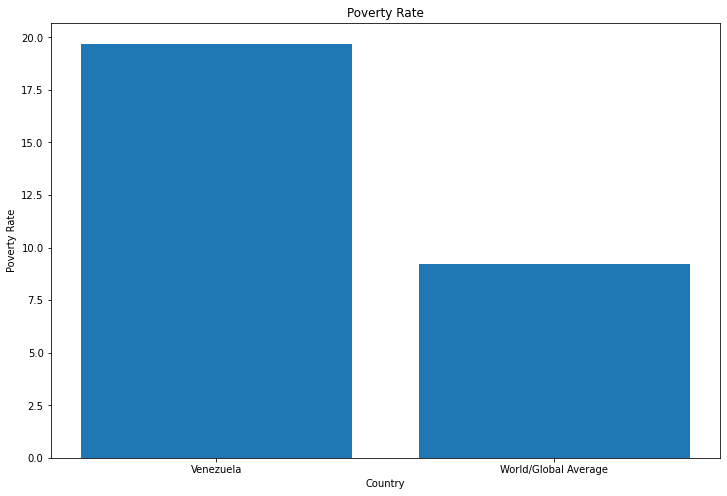

In [337]:
Poverty_Rate  = [19.7,9.2] #https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017
Country = ["Venezuela",	"World/Global Average"] 
Poverty_Rate

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(Country, Poverty_Rate)
ax.set_title("Poverty Rate")
ax.set_xlabel("Country")
ax.set_ylabel("Poverty Rate")

fig.show()

In [339]:
df= pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=299,&s=TMG_RPCH,&sy=1990&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1")
df = df[0]
df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,Volume of Imports of goods,Percent change,NaN,NaN,2.447,25.24,4.752,-11.738,-28.4,31.011,-15.485,62.421,14.298,-11.449,14.985,15.789,-28.215,-23.457,66.582,38.777,40.169,31.575,3.187,-21.528,-6.101,13.803,24.948,-9.687,-18.532,-23.102,-50.061,-34.651,-10.074,-33.14,-14.796


In [340]:
df=df.drop(columns=['Subject Descriptor',"Units","Scale","Country/Series-specific Notes"])
df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,2.447,25.24,4.752,-11.738,-28.4,31.011,-15.485,62.421,14.298,-11.449,14.985,15.789,-28.215,-23.457,66.582,38.777,40.169,31.575,3.187,-21.528,-6.101,13.803,24.948,-9.687,-18.532,-23.102,-50.061,-34.651,-10.074,-33.14,-14.796


In [341]:
Years= list(df) # Listing numbers from tuition fee for UMBC
Years

['Country',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [342]:
Years.remove('Country') 
Years

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [343]:
long_df = df.melt(
    id_vars="Country",                          # Unique identifier
    value_vars=Years_2,    # List of columns to be melted to a single variable
    var_name="Years_2",                          # The new column name for the variable
    value_name="Imports Growth Rate"                         # The new column name for the value
)

long_df

,Country,Years_2,Imports Growth Rate
0,Venezuela,1990,2.447
1,Venezuela,1991,25.240
2,Venezuela,1992,4.752
3,Venezuela,1993,-11.738
4,Venezuela,1994,-28.400
5,Venezuela,1995,31.011
6,Venezuela,1996,-15.485
7,Venezuela,1997,62.421
8,Venezuela,1998,14.298
9,Venezuela,1999,-11.449


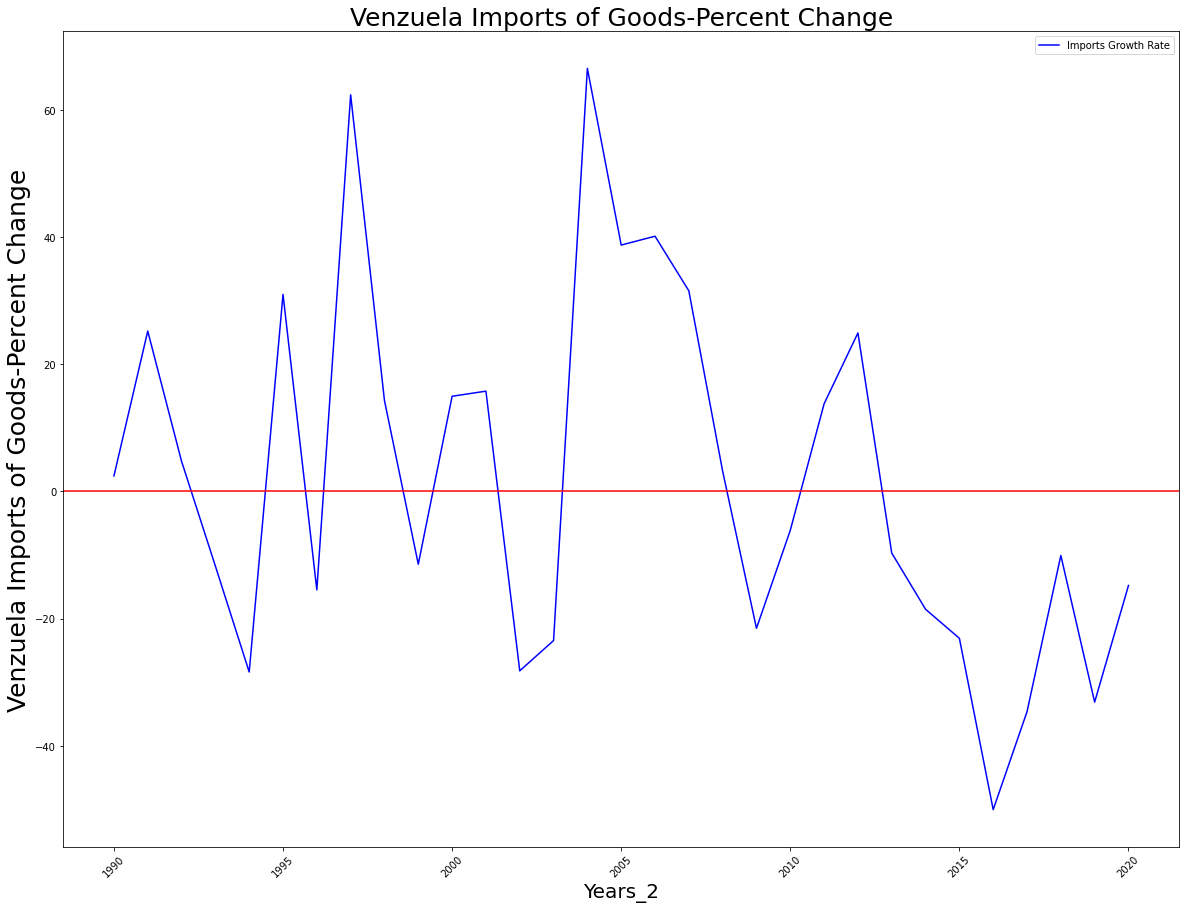

In [346]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
long_df.plot(kind="line",x="Years_2",y="Imports Growth Rate", legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)
plt.axhline(y=0, color='r') 



In [259]:
df = pd.read_csv("/content/DP_LIVE_25102020061630321.csv") # Upload file from college scoreboard raw data folder, this code reads the file but not every line for spacing. 
df  

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,EDUEXP,TRY,USD_STUDENT,A,2015,17555.235,NaN
1,AUT,EDUEXP,TRY,USD_STUDENT,A,2016,NaN,M
2,CZE,EDUEXP,TRY,USD_STUDENT,A,2015,10890.714,NaN
3,CZE,EDUEXP,TRY,USD_STUDENT,A,2016,NaN,M
4,FRA,EDUEXP,TRY,USD_STUDENT,A,2015,16144.755,NaN
...,...,...,...,...,...,...,...,...
179,SAU,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2016,NaN,M
180,SVN,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2015,8610.292,NaN
181,SVN,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2016,NaN,M
182,ZAF,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2015,NaN,M


In [260]:
df.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df=df.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df

,LOCATION,Value
0,AUT,17555.235
1,AUT,NaN
2,CZE,10890.714
3,CZE,NaN
4,FRA,16144.755
...,...,...
179,SAU,NaN
180,SVN,8610.292
181,SVN,NaN
182,ZAF,NaN


In [261]:
# sort - ascending order
import pandas as pd
 

df.sort_values(by=['Value'], inplace=True)
df

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
62,IDN,3764.700
68,GRC,4094.526
...,...,...
178,SAU,NaN
179,SAU,NaN
181,SVN,NaN
182,ZAF,NaN


In [262]:
df.drop_duplicates(subset=['LOCATION'])
df=df.drop_duplicates(subset=['LOCATION'])
df

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
68,GRC,4094.526
170,ISR,4185.221
100,CZE,4953.118
84,COL,5040.455
176,RUS,5061.743
172,LVA,5313.316
174,LTU,5479.133


In [263]:
df.dropna(axis='rows')
df=df.dropna(axis='rows')
df

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
68,GRC,4094.526
170,ISR,4185.221
100,CZE,4953.118
84,COL,5040.455
176,RUS,5061.743
172,LVA,5313.316
174,LTU,5479.133


In [264]:
df.describe()

,Value
count,36.000000
mean,8783.724667
std,5687.274080
min,169.575000
25%,5437.678750
50%,7037.965500
75%,10362.087500
max,30003.244000


In [265]:
df.tail(30)
df

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
68,GRC,4094.526
170,ISR,4185.221
100,CZE,4953.118
84,COL,5040.455
176,RUS,5061.743
172,LVA,5313.316
174,LTU,5479.133


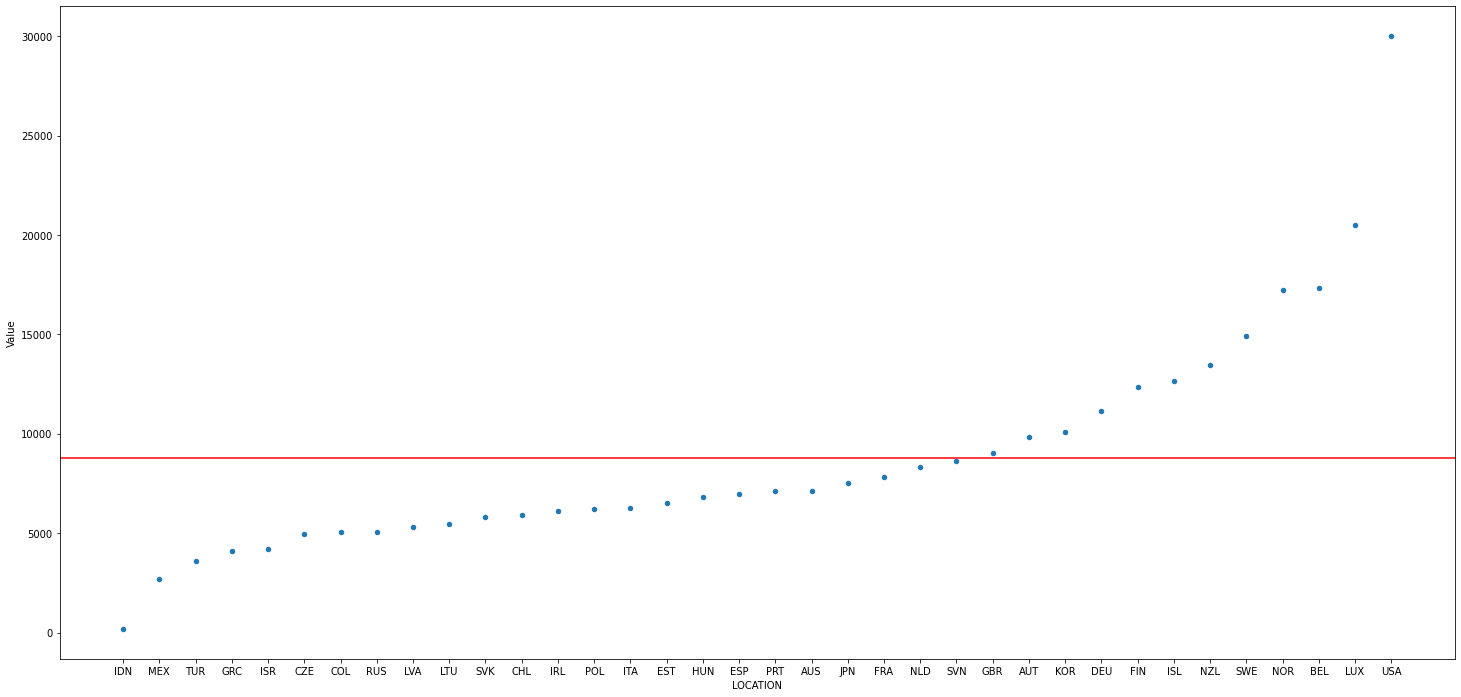

In [266]:
df.plot(kind='scatter',x='LOCATION',y='Value')
plt.axhline(y=8783.724666666667, color='r')

In [272]:
df.tail(12)
df=df.tail(12)
df

,LOCATION,Value
148,GBR,9048.388
94,AUT,9824.383
72,KOR,10108.948
108,DEU,11121.506
104,FIN,12332.219
40,ISL,12670.652
130,NZL,13465.562
142,SWE,14917.142
132,NOR,17224.679
44,BEL,17320.185


In [273]:
Top_12 = list(df["LOCATION"]) # Listing numbers from tuition fee for UMBC
Top_12

['GBR',
 'AUT',
 'KOR',
 'DEU',
 'FIN',
 'ISL',
 'NZL',
 'SWE',
 'NOR',
 'BEL',
 'LUX',
 'USA']

In [274]:
df2 = pd.read_csv("/content/DP_LIVE_25102020054342653.csv") # Upload file from college scoreboard raw data folder, this code reads the file but not every line for spacing. 
df2.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df2=df2.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df2.sort_values(by=['Value'], inplace=True)
df2.drop_duplicates(subset=['LOCATION'])
df2=df2.drop_duplicates(subset=['LOCATION'])
df2
df2 = df2.set_index( "LOCATION", drop = False) # Find and display, selects the column "INSTMN" then filters to "University of Maryland-Baltimore County", can filter out later for Tuition Info
df2.loc[Top_12]
Top_12_GRAPH=df2.loc[Top_12]
Top_12_GRAPH

,LOCATION,Value
LOCATION,,
GBR,GBR,42522.183841
AUT,AUT,49955.456118
KOR,KOR,37907.460937
DEU,DEU,47622.331224
FIN,FIN,42501.611531
ISL,ISL,48856.560901
NZL,NZL,37403.074775
SWE,SWE,49116.236552
NOR,NOR,58917.288330


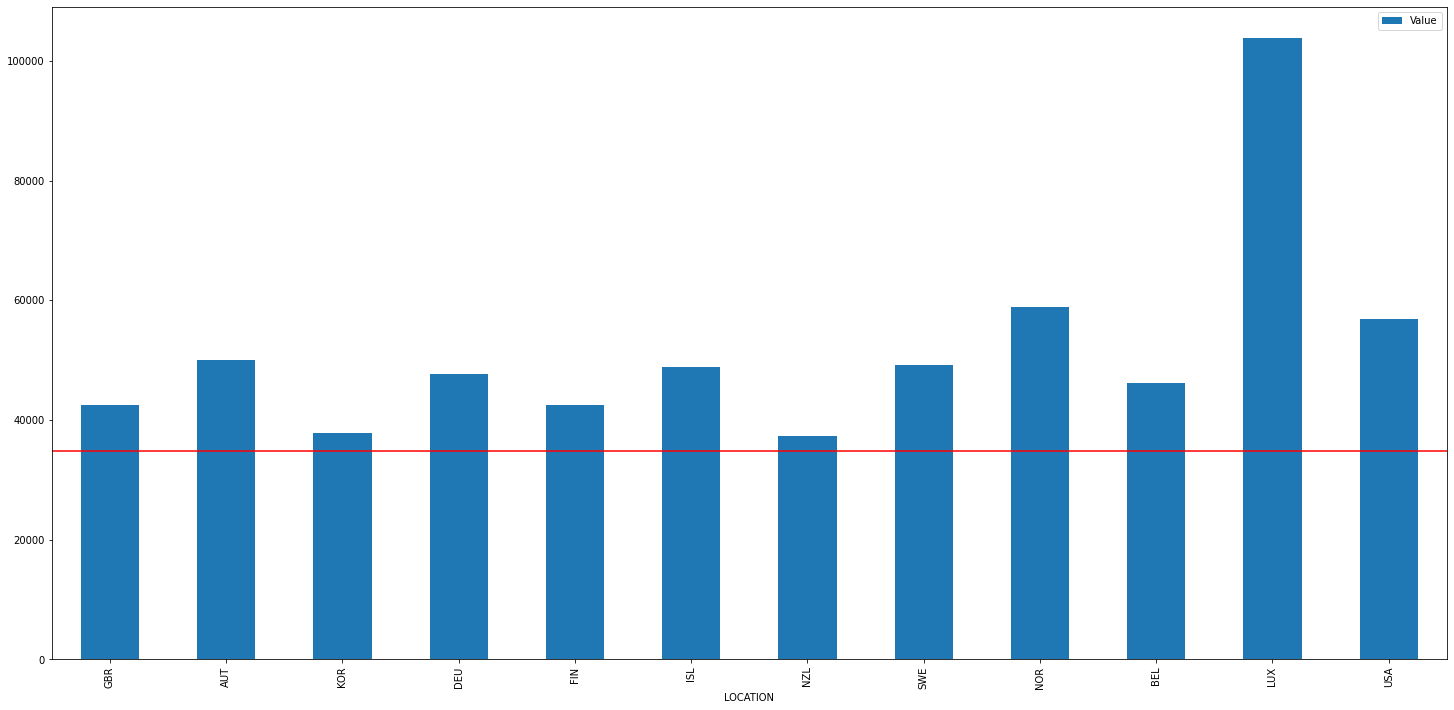

In [275]:
Top_12_GRAPH.plot(kind='bar',x='LOCATION',y='Value')
plt.axhline(y=34819.430959, color='r')

##**2. Background information-Venzuela**
# **Venzuela has an interesting history. Present day and historic Venzeula has many points of analysis. One can approach Venzuela, from a political or historical perspective. Others can choose to explore it from a economic or governmental perspective. What I think is most interesting is approaching it from a data perspective, and to infer and answer important economic, poltical, and governmental questions from there. Below are other interesting things about Venzuela.**


*   List item
*   List item
*   List item
*   List item
*   List item

##**3.What are the economic deficiencies?**





##HyperInflation

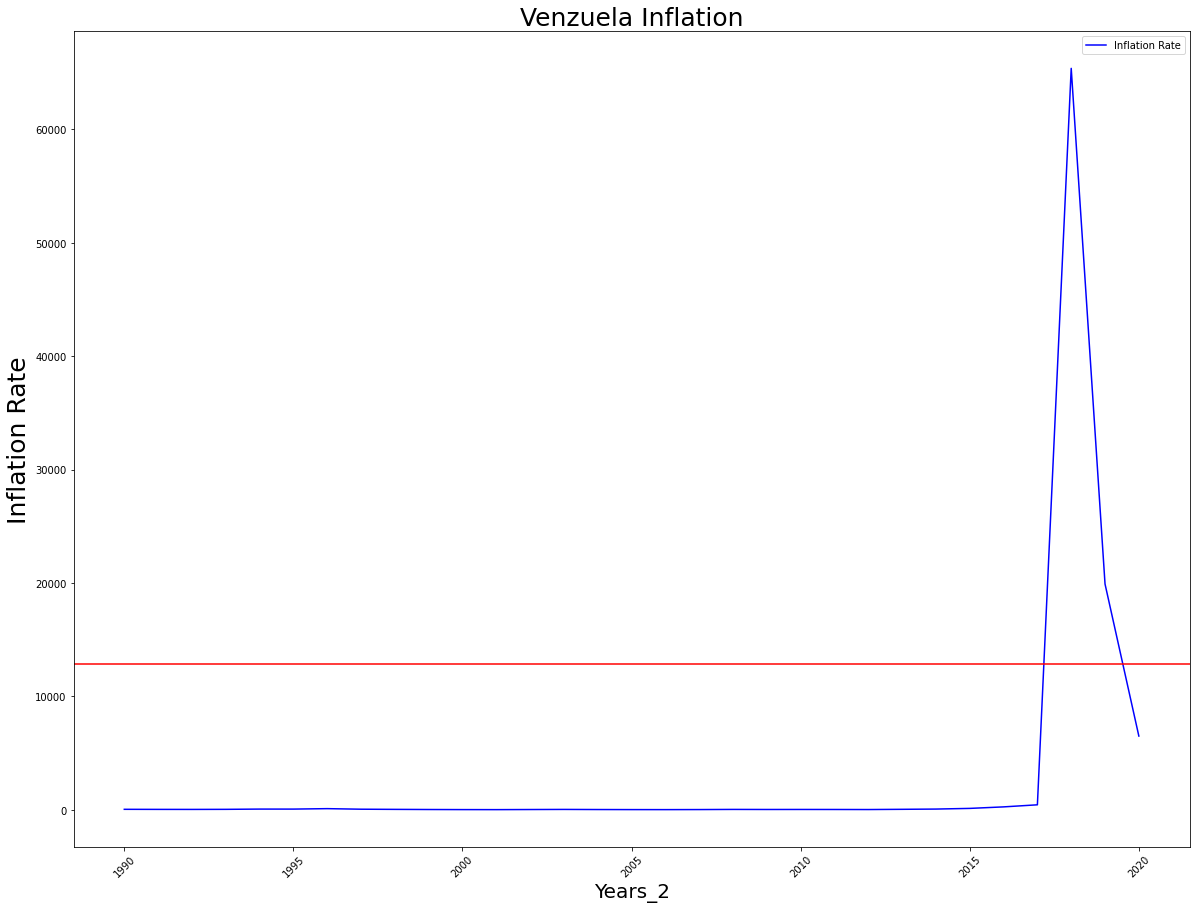

In [365]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Inflation Rate",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Inflation",fontname="Arial", fontsize=25)
long_df.plot(kind='line',x='Years_2',y='Inflation Rate', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)
plt.axhline(y=12874.63, color='r') 

**HyperInflation defined as 12,874.63% yearly, Venzuela is clearly over this amount as noted by the line labeled "hyperinflation".**

##Shrinking Economy 

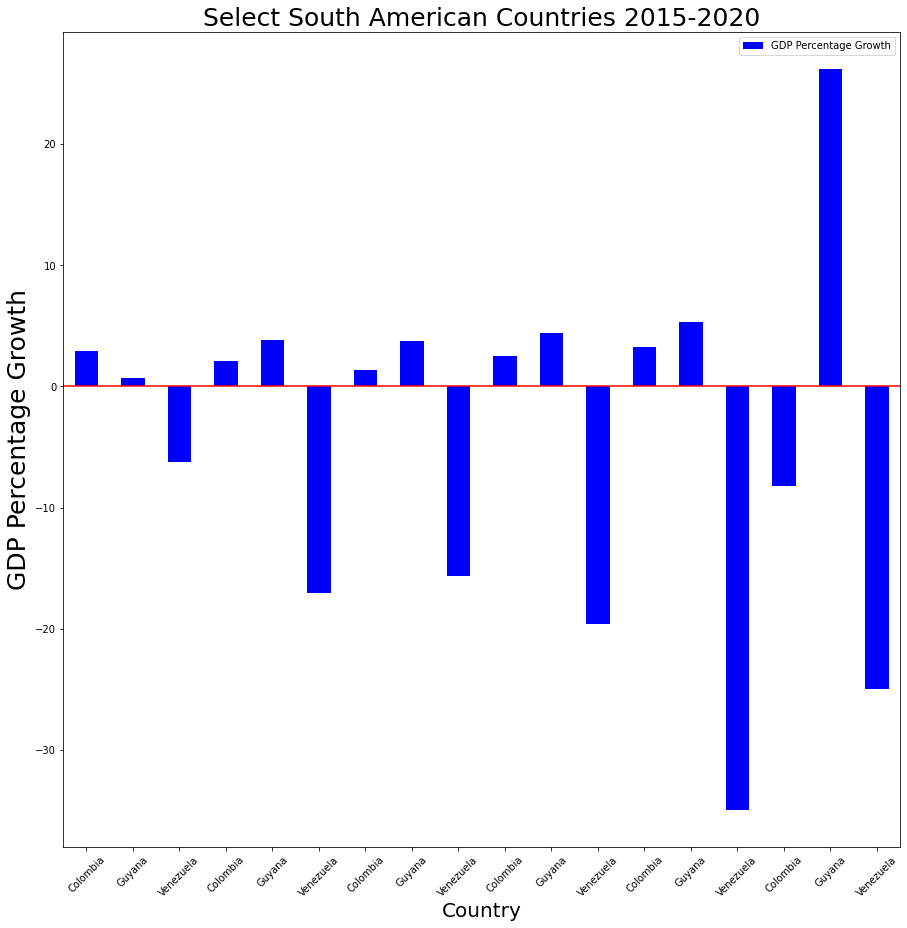

In [329]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_ylabel("GDP Percentage Growth",fontname="Arial", fontsize=25)
ax.set_xlabel("Country",fontname="Arial", fontsize=20)
ax.set_title("Select South American Countries 2015-2020",fontname="Arial", fontsize=25)
long_df.plot(kind='bar',x='Country',y='GDP Percentage Growth', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)
plt.axhline(y=0, color='r') 

**Everything seen is negative GDP "growth" for Venzuela**

##High Poverty Rate 

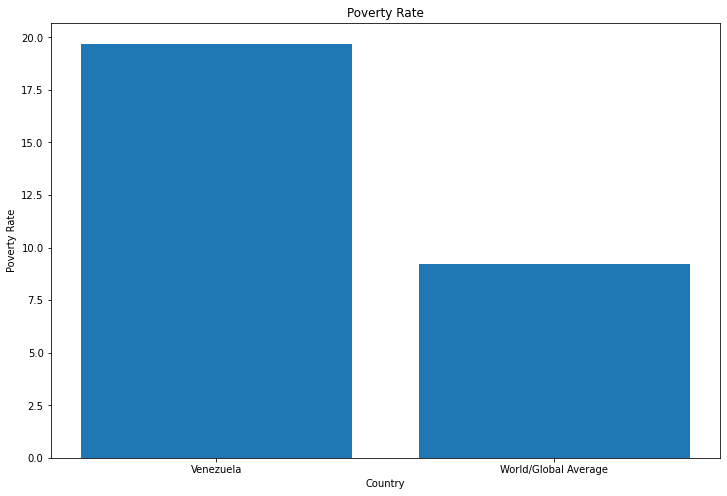

In [338]:
Poverty_Rate  = [19.7,9.2] #https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017
Country = ["Venezuela",	"World/Global Average"] 
Poverty_Rate

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(Country, Poverty_Rate)
ax.set_title("Poverty Rate")
ax.set_xlabel("Country")
ax.set_ylabel("Poverty Rate")

fig.show()

**Venzuela Poverty Rate higher than World Average**

##Decline of International Trade 

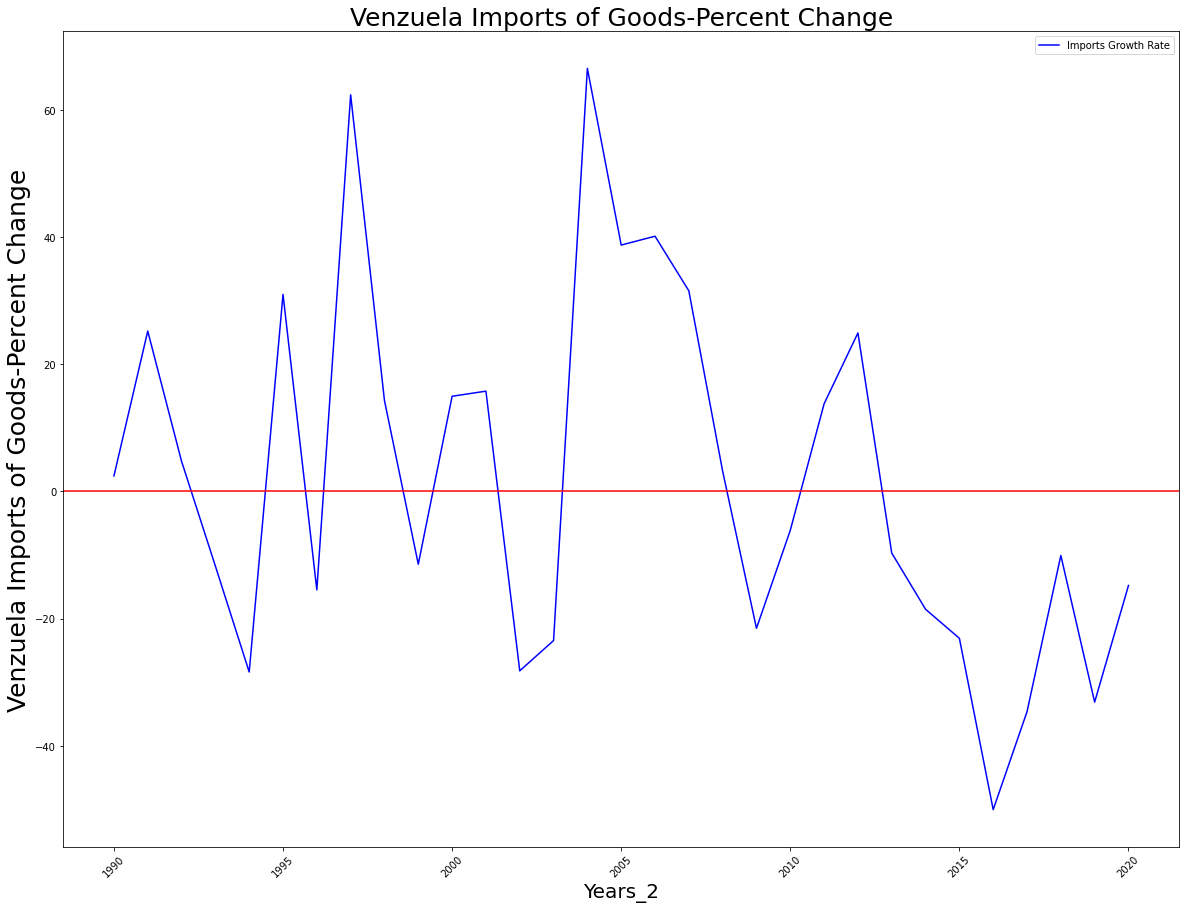

In [347]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
long_df.plot(kind="line",x="Years_2",y="Imports Growth Rate", legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)
plt.axhline(y=0, color='r') 


**Sanctions hurt imports for Venzuela.**

##**4. Solutions for economic problem areas.** 

##Solution 1:Attempt to Remove Sanctions 

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
long_df.plot(kind="line",x="Years_2",y="Imports Growth Rate", legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)
plt.axhline(y=0, color='r') 

##Solution 2:Reduce government spending to reduce hyper-inflation ( Show correlation) 

##Solution 3:Diversify economy beyond oil exports.

([<matplotlib.patches.Wedge at 0x7f4d0e18a978>,
 [Text(-0.49938947630209474, -0.9801072140121813, 'Petrolum'),
  Text(0.6741976190487652, 0.8691706221847216, 'Gold'),
  Text(0.33991851505592985, 1.0461622260061638, 'Alcohol'),
  Text(0.1378663750450849, 1.0913261944221482, 'Other')],
 [Text(-0.27239425980114257, -0.5346039349157352, '85.00%'),
  Text(0.367744155844781, 0.47409306664621176, '9.00%'),
  Text(0.18541009912141626, 0.5706339414579075, '2.00%'),
  Text(0.07519984093368266, 0.5952688333211716, '4.00%')])

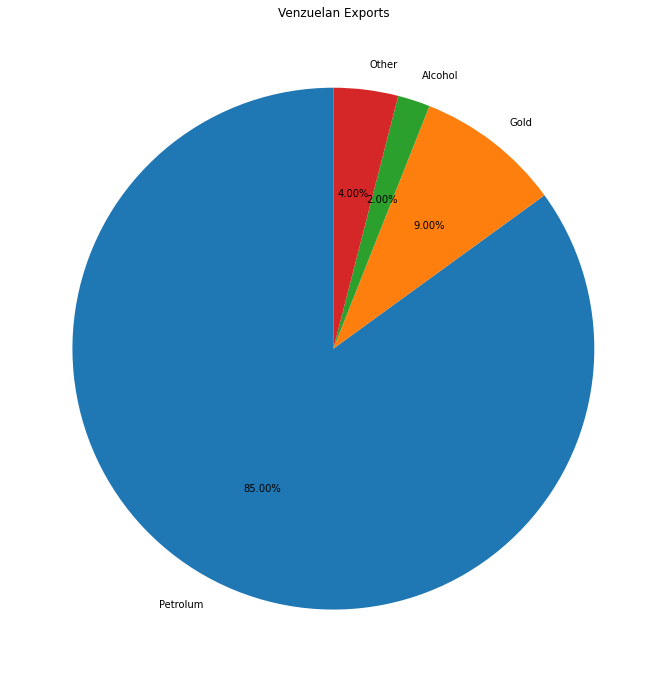

In [67]:
#https://oec.world/en/profile/country/ven/
Exports = ['Petrolum', 'Gold', 'Alcohol', 'Other']
Export_1 = [85,9,2,4]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Venzuelan Exports")
ax.pie(x=Export_1, labels=Exports, startangle=90,autopct='%.2f%%')

##Solution 3A: To diversify, increase educational investments. Wealthy nations make alot of investments in education so should Venzuela but within its limits.

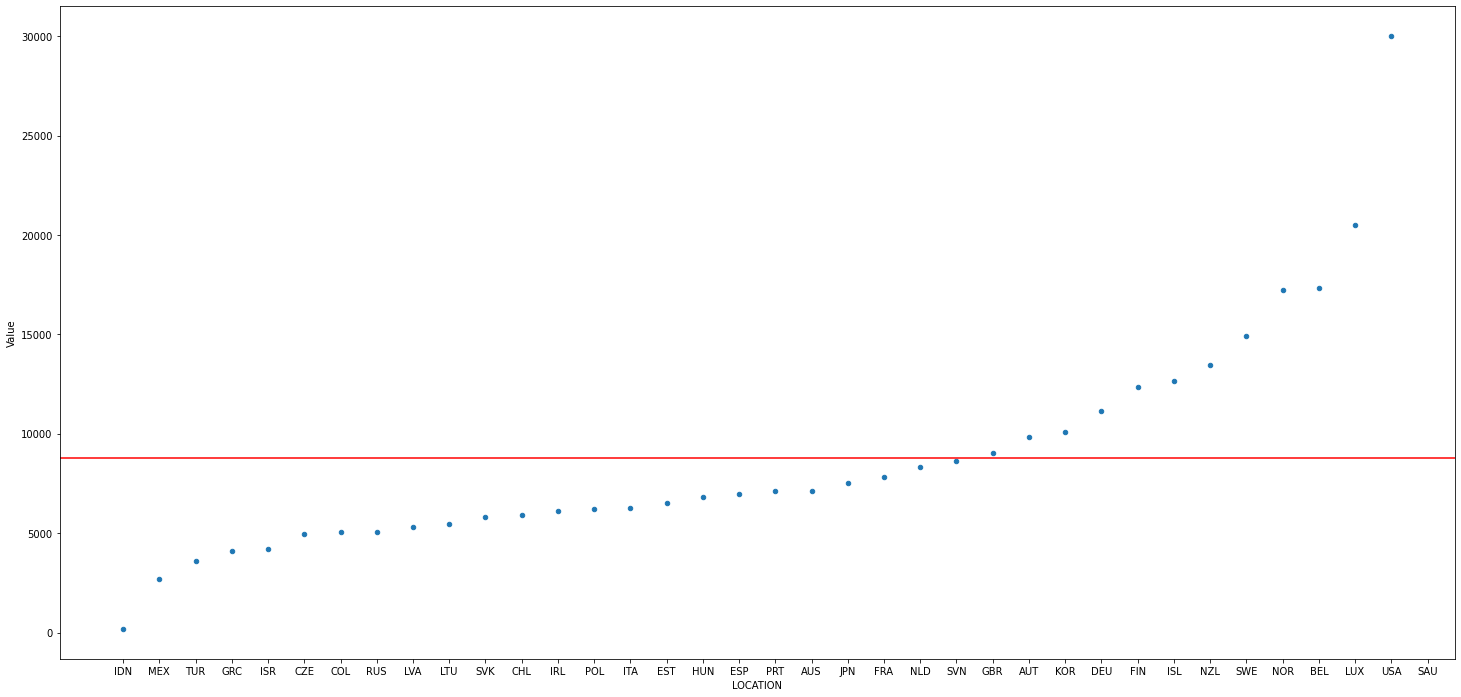

In [61]:
df.plot(kind='scatter',x='LOCATION',y='Value')
plt.axhline(y=8783.724666666667, color='r')

**Lets look at top 12 countries to see wealth vs education, below**

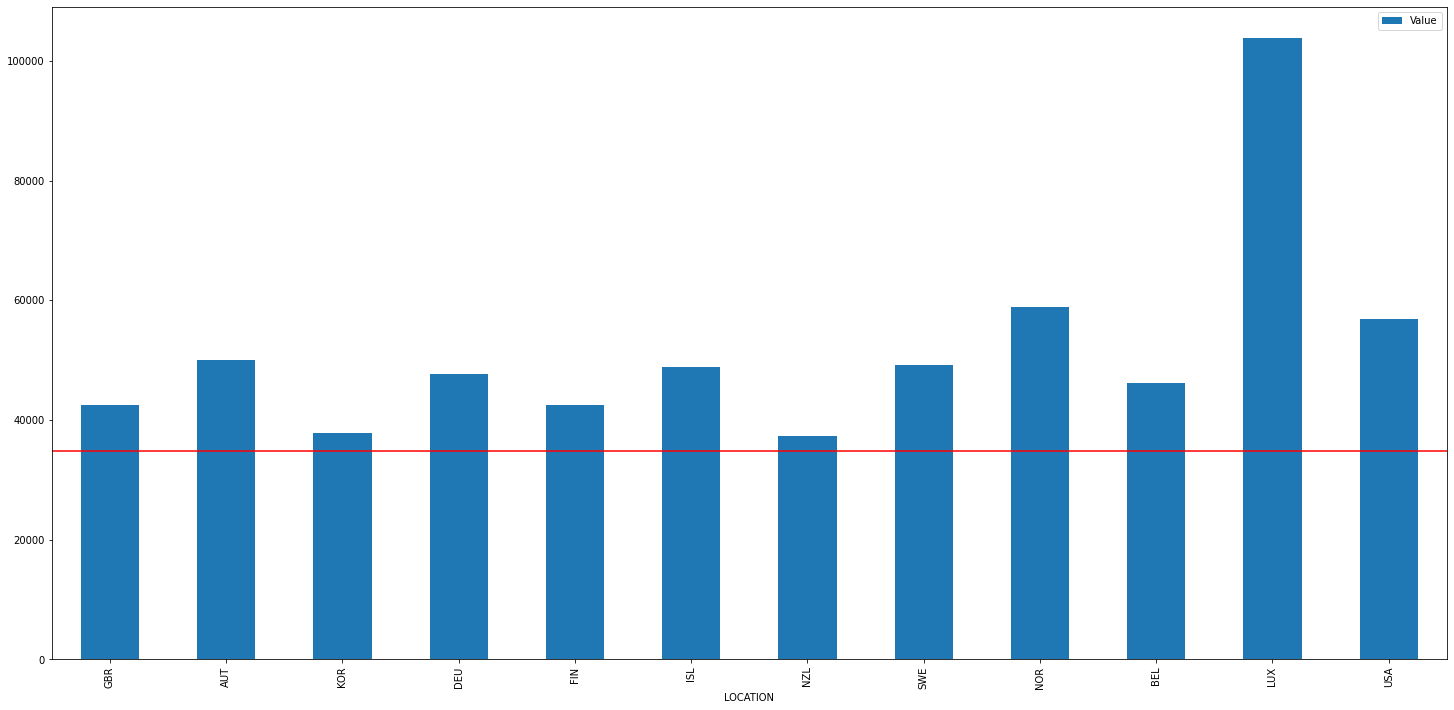

In [59]:
Top_12_GRAPH.plot(kind='bar',x='LOCATION',y='Value')
plt.axhline(y=34819.430959, color='r')

**The value of a good education shows, all 12 countries are above the mean gdp per capita of 34819. This is to say one thing, education is a important in the creation of wealth in a country. Education...**

##**5. Conclusion**
**To be done later.**

##**6. References**
https://www.cia.gov/library/publications/the-world-factbook/geos/ve.html

https://www.focus-economics.com/countries/venezuela


https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017.


https://www.statista.com/statistics/371895/inflation-rate-in-venezuela/


https://data.worldbank.org/country/venezuela-rb

http://hdr.undp.org/en/content/expenditure-education-public-gdp

https://www.imf.org/external/index.htm